In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt

In [3]:
import os
import pickle

In [4]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [5]:
from scipy.stats import pearsonr, spearmanr

In [6]:
criteria = "lt0_1" # ut_0_7 or lt0_1
file_path = f"/data/ajayago/papers_data/DiffDRP_v7/run_files/saved_model_annotated_mutations/"

In [7]:
# experiment 1A settings
with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment1/SettingA/patients_fold0_processed.pkl", "rb") as f:
    exp1A_patient_fold0 = pickle.load(f)

with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment1/SettingA/patients_fold1_processed.pkl", "rb") as f:
    exp1A_patient_fold1 = pickle.load(f)

with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment1/SettingA/patients_fold2_processed.pkl", "rb") as f:
    exp1A_patient_fold2 = pickle.load(f)

In [8]:
with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment2/SettingA/patients_fold0_processed.pkl", "rb") as f:
    exp2A_fold0 = pickle.load(f)

with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment2/SettingA/patients_fold1_processed.pkl", "rb") as f:
    exp2A_fold1 = pickle.load(f)

with open("/data/ajayago/papers_data/systematic_assessment/input_types/annotated_mutations/Experiment2/SettingA/patients_fold2_processed.pkl", "rb") as f:
    exp2A_fold2 = pickle.load(f)

In [9]:
combined_df_fold0_subset = pd.DataFrame()
for d in ['FLUOROURACIL', 'GEMCITABINE', 'PACLITAXEL', 'TEMOZOLOMIDE', 'CISPLATIN']:
    print(exp1A_patient_fold0["test"][d].shape)
    combined_df_fold0_subset = pd.concat([combined_df_fold0_subset, exp1A_patient_fold0["test"][d][["sample_id", "drug_name", "recist"]]], ignore_index=True)

(12, 7781)
(14, 7781)
(8, 7781)
(30, 7781)
(27, 7781)


In [10]:
combined_df_fold1_subset = pd.DataFrame()
for d in ['FLUOROURACIL', 'GEMCITABINE', 'PACLITAXEL', 'TEMOZOLOMIDE', 'CISPLATIN']:
    print(exp1A_patient_fold1["test"][d].shape)
    combined_df_fold1_subset = pd.concat([combined_df_fold1_subset, exp1A_patient_fold1["test"][d][["sample_id", "drug_name", "recist"]]], ignore_index=True)

(11, 7781)
(11, 7781)
(10, 7781)
(30, 7781)
(30, 7781)


In [11]:
combined_df_fold2_subset = pd.DataFrame()
for d in ['FLUOROURACIL', 'GEMCITABINE', 'PACLITAXEL', 'TEMOZOLOMIDE', 'CISPLATIN']:
    print(exp1A_patient_fold2["test"][d].shape)
    combined_df_fold2_subset = pd.concat([combined_df_fold2_subset, exp1A_patient_fold2["test"][d][["sample_id", "drug_name", "recist"]]], ignore_index=True)

(11, 7781)
(15, 7781)
(8, 7781)
(28, 7781)
(28, 7781)


In [12]:
os.listdir(file_path)

['DRP_model_val_corr_2A_ALL_fold1.pth',
 'prediction_cell_lines_val_corr_2A_ALL_fold2.csv',
 'prediction_patients_val_corr_2A_ALL_fold1_tuned4CISPLATIN.csv',
 'prediction_patients_val_corr_2A_ALL_fold2_tuned4PACLITAXEL.csv',
 'prediction_patients_val_corr_2A_ALL_fold0_tuned4FLUOROURACIL.csv',
 'sensitivity_lt0_4_ut_0_7',
 'best_val_corr_2A_ALL_fold0_cool-sweep-14.pkl',
 'prediction_patients_val_corr_2A_ALL_fold2_tuned4FLUOROURACIL.csv',
 'BaselineNN_1_val_corr_2A_ALL_fold0.pth',
 'best_pretrained_vae_validation_loss_val_corr_2A_ALL_fold2_cell_line.pth',
 'DRP_model_val_corr_2A_ALL_fold1_tuned4GEMCITABINE.pth',
 'best_pretrained_vae_validation_loss_val_corr_2A_ALL_fold1_patient.pth',
 'working_fold0',
 'DRP_model_val_corr_2A_ALL_fold2_tuned4GEMCITABINE.pth',
 'prediction_patients_val_corr_2A_ALL_fold2_tuned4GEMCITABINE.csv',
 'prediction_patients_val_corr_2A_ALL_fold2_tuned4TEMOZOLOMIDE.csv',
 'best_val_corr_2A_ALL_fold0_generous-sweep-4.pkl',
 'best_pretrained_validation_loss_val_corr_

In [13]:
fold = 0
res_df0 = pd.DataFrame()
for f in os.listdir(file_path):
    if criteria in f:
        path = f"{file_path}/{f}/prediction_patients_val_corr_2A_ALL_fold{fold}.csv"
        df = pd.read_csv(path, index_col=0)
        combined_df = pd.concat([exp2A_fold0["test"][["sample_id", "drug_name", "recist", "mappedProject", "dataset_name"]],df], axis=1)
        # fold_df = pd.merge(combined_df, combined_df_fold0_subset, on=["sample_id", "drug_name"])
        # print(fold_df.shape)
        auroc_val = round(roc_auc_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        auprc_val = round(average_precision_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        pearsonr_val = pearsonr(combined_df["y_true"], combined_df["y_pred"])
        thresh = f.split(f"_{criteria}")
        if "ut" in criteria:
            thresh_val = thresh[0].split("_")[-1]
        elif "lt" in criteria:
            thresh_val = thresh[1].split("_")[-1]
        res_dict = {"AUROC": auroc_val, "AUPRC": auprc_val, "pearsonr": pearsonr_val.statistic, "pearsonr_pval": pearsonr_val.pvalue, "threshold": f"0.{thresh_val}", "fold": fold}
        res_df0 = res_df0._append(res_dict, ignore_index=True)

res_df0

,AUROC,AUPRC,pearsonr,pearsonr_pval,threshold,fold
0,0.8041,0.7585,0.535586,6.938969e-10,0.7,0
1,0.8340,0.6843,0.651162,3.304639e-15,0.6,0
2,0.8598,0.7952,0.617287,2.026883e-13,0.8,0
3,0.8361,0.6865,0.657403,1.461301e-15,0.5,0
4,0.7456,0.7320,0.489261,2.882076e-08,0.9,0


In [14]:
df

,y_pred,y_true
0,0.047682,0
1,0.067339,0
2,0.042251,0
3,0.054963,0
4,0.050725,0
...,...,...
110,0.108783,0
111,0.158565,0
112,0.092595,1
113,0.097067,0


In [15]:
fold = 1
res_df1 = pd.DataFrame()
for f in os.listdir(file_path):
    if criteria in f:
        path = f"{file_path}/{f}/prediction_patients_val_corr_2A_ALL_fold{fold}.csv"
        df = pd.read_csv(path, index_col=0)
        combined_df = pd.concat([exp2A_fold1["test"][["sample_id", "drug_name", "recist", "mappedProject", "dataset_name"]],df], axis=1)
        # fold_df = pd.merge(combined_df, combined_df_fold0_subset, on=["sample_id", "drug_name"])
        # print(fold_df.shape)
        auroc_val = round(roc_auc_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        auprc_val = round(average_precision_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        pearsonr_val = pearsonr(combined_df["y_true"], combined_df["y_pred"])
        thresh = f.split(f"_{criteria}")
        if "ut" in criteria:
            thresh_val = thresh[0].split("_")[-1]
        elif "lt" in criteria:
            thresh_val = thresh[1].split("_")[-1]
        res_dict = {"AUROC": auroc_val, "AUPRC": auprc_val, "pearsonr": pearsonr_val.statistic, "pearsonr_pval": pearsonr_val.pvalue, "threshold": f"0.{thresh_val}", "fold": fold}
        # res_dict = {"AUROC": auroc_val, "AUPRC": auprc_val, "pearsonr": pearsonr_val.statistic, "pearsonr_pval": pearsonr_val.pvalue, "threshold": f"{f.split('_')[-2]}.{f.split('_')[-1]}", "fold": fold}
        res_df1 = res_df1._append(res_dict, ignore_index=True)

res_df1

,AUROC,AUPRC,pearsonr,pearsonr_pval,threshold,fold
0,0.8892,0.8069,0.688215,2.669143e-17,0.7,1
1,0.8535,0.7575,0.696435,7.757459e-18,0.6,1
2,0.9012,0.8555,0.708159,1.236783e-18,0.8,1
3,0.8605,0.7611,0.677683,1.226184e-16,0.5,1
4,0.9009,0.8586,0.708858,1.105397e-18,0.9,1


In [16]:
fold = 2
res_df2 = pd.DataFrame()
for f in os.listdir(file_path):
    if criteria in f:
        path = f"{file_path}/{f}/prediction_patients_val_corr_2A_ALL_fold{fold}.csv"
        df = pd.read_csv(path, index_col=0)
        combined_df = pd.concat([exp2A_fold2["test"][["sample_id", "drug_name", "recist", "mappedProject", "dataset_name"]],df], axis=1)
        # fold_df = pd.merge(combined_df, combined_df_fold0_subset, on=["sample_id", "drug_name"])
        # print(fold_df.shape)
        auroc_val = round(roc_auc_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        auprc_val = round(average_precision_score(combined_df["y_true"], combined_df["y_pred"]), 4)
        pearsonr_val = pearsonr(combined_df["y_true"], combined_df["y_pred"])
        thresh = f.split(f"_{criteria}")
        if "ut" in criteria:
            thresh_val = thresh[0].split("_")[-1]
        elif "lt" in criteria:
            thresh_val = thresh[1].split("_")[-1]
        res_dict = {"AUROC": auroc_val, "AUPRC": auprc_val, "pearsonr": pearsonr_val.statistic, "pearsonr_pval": pearsonr_val.pvalue, "threshold": f"0.{thresh_val}", "fold": fold}
        # res_dict = {"AUROC": auroc_val, "AUPRC": auprc_val, "pearsonr": pearsonr_val.statistic, "pearsonr_pval": pearsonr_val.pvalue, "threshold": f"{f.split('_')[-2]}.{f.split('_')[-1]}", "fold": fold}
        res_df2 = res_df2._append(res_dict, ignore_index=True)

res_df2

,AUROC,AUPRC,pearsonr,pearsonr_pval,threshold,fold
0,0.8294,0.7686,0.605509,1.206041e-12,0.7,2
1,0.8186,0.7371,0.604295,1.374088e-12,0.6,2
2,0.8479,0.8118,0.632168,5.940928e-14,0.8,2
3,0.8189,0.7267,0.624099,1.523375e-13,0.5,2
4,0.8479,0.8118,0.632168,5.940928e-14,0.9,2


In [17]:
all_folds_df = pd.concat([res_df0, res_df1, res_df2])
all_folds_df

,AUROC,AUPRC,pearsonr,pearsonr_pval,threshold,fold
0,0.8041,0.7585,0.535586,6.938969e-10,0.7,0
1,0.8340,0.6843,0.651162,3.304639e-15,0.6,0
2,0.8598,0.7952,0.617287,2.026883e-13,0.8,0
3,0.8361,0.6865,0.657403,1.461301e-15,0.5,0
4,0.7456,0.7320,0.489261,2.882076e-08,0.9,0
0,0.8892,0.8069,0.688215,2.669143e-17,0.7,1
1,0.8535,0.7575,0.696435,7.757459e-18,0.6,1
2,0.9012,0.8555,0.708159,1.236783e-18,0.8,1
3,0.8605,0.7611,0.677683,1.226184e-16,0.5,1
4,0.9009,0.8586,0.708858,1.105397e-18,0.9,1


In [18]:
all_folds_df.groupby(["threshold"]).agg("mean")

,AUROC,AUPRC,pearsonr,pearsonr_pval,fold
threshold,,,,,
0.5,0.838500,0.724767,0.653062,5.130715e-14,1.0
0.6,0.835367,0.726300,0.650630,4.591334e-13,1.0
0.7,0.840900,0.778000,0.609770,2.317010e-10,1.0
0.8,0.869633,0.820833,0.652538,8.736628e-14,1.0
0.9,0.831467,0.800800,0.610096,9.606941e-09,1.0


In [19]:
all_folds_df_plt = pd.melt(all_folds_df, id_vars="threshold", value_vars=["AUROC", "AUPRC"], value_name="metric").rename(columns={"metric": "value", "variable": "metric"})
all_folds_df_plt

,threshold,metric,value
0,0.7,AUROC,0.8041
1,0.6,AUROC,0.8340
2,0.8,AUROC,0.8598
3,0.5,AUROC,0.8361
4,0.9,AUROC,0.7456
5,0.7,AUROC,0.8892
6,0.6,AUROC,0.8535
7,0.8,AUROC,0.9012
8,0.5,AUROC,0.8605
9,0.9,AUROC,0.9009


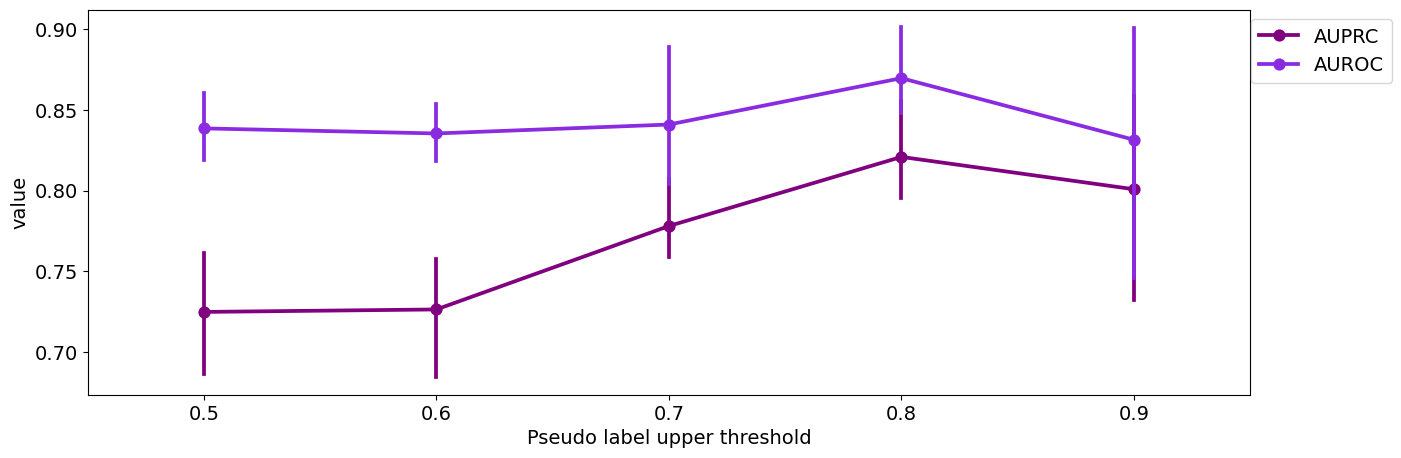

In [20]:
# Converting above to point plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.pointplot(
    data=all_folds_df_plt.sort_values(by="threshold"), x="threshold", y="value", hue="metric", errorbar=("ci", 95),ax=ax, markers="o", palette={"AUROC": "blueviolet", "AUPRC": "purple"}
)

plt.legend(bbox_to_anchor=(1.13, 1))
if "ut" in criteria:
    plt.xlabel("Pseudo label lower threshold")
elif "lt" in criteria:
    plt.xlabel("Pseudo label upper threshold")
# plt.xlim(-0.1, 2.1)